# Air Pollution Forecasting

This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

**Data Description**

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

pm2.5: PM2.5 concentration

DEWP: Dew Point

TEMP: Temperature

PRES: Pressure

cbwd: Combined wind direction

Iws: Cumulated wind speed

Is: Cumulated hours of snow

Ir: Cumulated hours of rain

**We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [82]:
filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv'

In [83]:
data = pd.read_csv(filepath)

In [84]:
data.shape

(43824, 13)

In [85]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [86]:
del data['No']

In [87]:
data.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [88]:
data.columns = ['year', 'month', 'day', 'hour', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [89]:
data.head()

,year,month,day,hour,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


### Datatypes

In [90]:
data.dtypes

year           int64
month          int64
day            int64
hour           int64
pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object

-  we have to change wind direction from object to int64

-  we are going to join the first four columns of date and time to create a timsestep column

In [91]:
# create a timestamp column
data['Timestamp'] = pd.to_datetime(data[['year', 'month', 'day' , 'hour']])

# we can drop these column then
data.drop(['year', 'month', 'day' , 'hour'], axis=1, inplace=True)
data.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,Timestamp
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [92]:
# set timestamp as an index
data.index = data['Timestamp']
del data['Timestamp']

-  Lets also change **Combined wind direction (cbwd)** from object to numerical
-  This could further be one-hot encoded in the future if you are interested in exploring it.

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
encoder = LabelEncoder()

data['wnd_dir'] = encoder.fit_transform(data['wnd_dir'])
data['wnd_dir'].value_counts()

2    15290
1    14150
3     9387
0     4997
Name: wnd_dir, dtype: int64

### Missing values

In [106]:
data.isna().mean()*100

pollution    4.716594
dew          0.000000
temp         0.000000
press        0.000000
wnd_dir      0.000000
wnd_spd      0.000000
snow         0.000000
rain         0.000000
dtype: float64

In [111]:
data.head(30)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
Timestamp,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,1,12.97,0,0
2010-01-01 05:00:00,NaN,-19,-10.0,1017.0,1,16.10,0,0
2010-01-01 06:00:00,NaN,-19,-9.0,1017.0,1,19.23,0,0
2010-01-01 07:00:00,NaN,-19,-9.0,1017.0,1,21.02,0,0
2010-01-01 08:00:00,NaN,-19,-9.0,1017.0,1,24.15,0,0


In [110]:
data[data['pollution'].isna()==True]

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
Timestamp,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-20 12:00:00,NaN,-18,0.0,1030.0,1,244.97,0,0
2014-12-20 13:00:00,NaN,-19,1.0,1029.0,1,249.89,0,0
2014-12-20 14:00:00,NaN,-20,1.0,1029.0,1,257.04,0,0


-  A quick check reveals NA values for pm2.5 for the first 16 hours. We will, therefore, need to remove the first 24 hours row of data. There are also a few scattered “NA” values later in the dataset; we can mark them with 0 values for now.

In [112]:
data = data.iloc[24:,:]

<Figure size 1080x432 with 0 Axes>

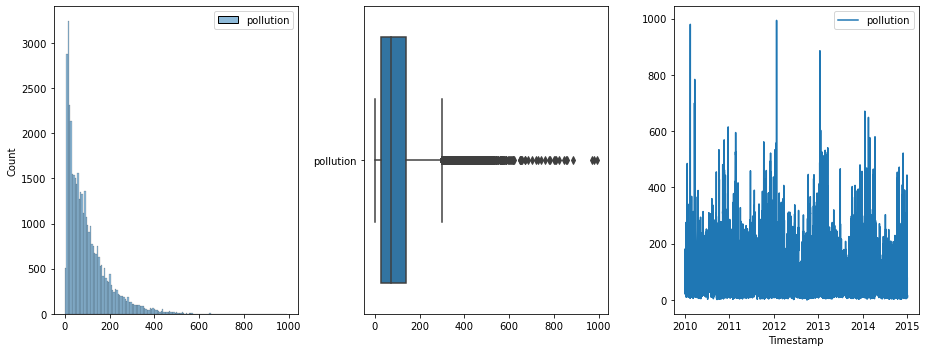

In [113]:
plt.rcParams['figure.figsize'] = (13,5)
plt.rcParams['axes.grid']=False
plt.figure(figsize=(15,6))
fig,axes=plt.subplots(1,3)
sns.histplot(data = data[['pollution']], ax=axes[0])
sns.boxplot(data = data[['pollution']], orient='h', ax=axes[1])
sns.lineplot(data = data[['pollution']], ax=axes[2])
plt.tight_layout()
plt.show()

-  There are plenty of outliers, which significantly influence the mean
-  therefore, we will replace the remainder of missing values using the median values.
-  another strategy, since this is a timeseries data, could be to look at the previous values of values after in that day and use the mean of such values to replace the missing values

In [114]:
# replace missing values with median
data['pollution'].fillna(data['pollution'].median(), inplace=True)

In [115]:
data.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
Timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


### Duplicates

In [116]:
data.duplicated().sum()

14

In [119]:
data.drop_duplicates(keep='first', inplace=True)

In [120]:
data[data.duplicated()==True]

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
Timestamp,,,,,,,,


# EDA

### Univariate Analysis

In [121]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

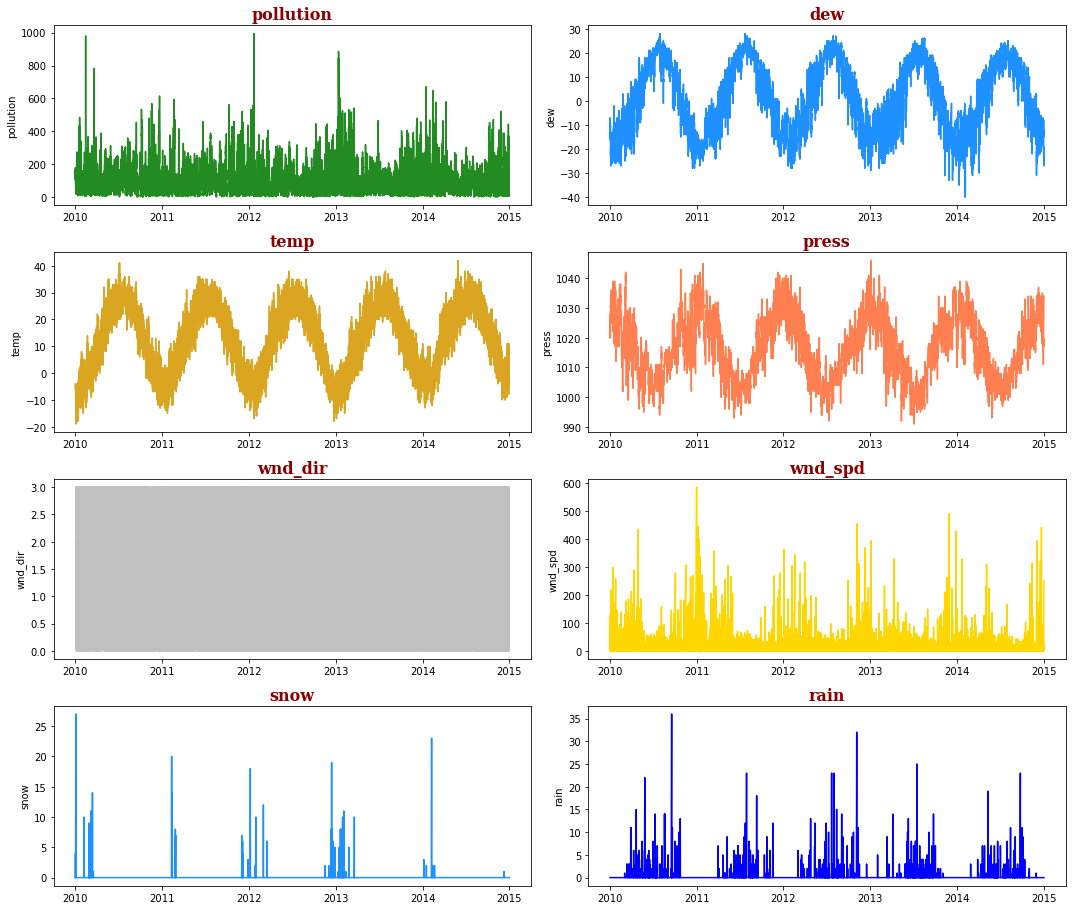

In [122]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue', 'blue'];
Num_cols = data.columns.tolist()
fig = plt.figure(figsize=(15, 13))
fig.subplots_adjust(top=0.92, hspace = 0.3, wspace = 0.3)

for i, col in enumerate(Num_cols):
    ax1 = fig.add_subplot(4, 2, i+1);
    ax1 = sns.lineplot(data = data[col], color= colours[i])
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)
    plt.tight_layout()
    plt.xlabel(None)

-  We can see that there is seasonality in the data
-  When Temperature increases, there DEW point and rain also increases
-  The inverse is true with pollution, pressure, snow, wind speed

# 3. Multivariate LSTM Forecast Model

## LSTM Data Preparation

The first step is to prepare the pollution dataset for the LSTM.

This involves framing the dataset as a supervised learning problem and normalizing the input variables

**We will frame the supervised learning problem as predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step.**

### Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
# ensure all data is float
data = data.astype(float)

In [133]:
scaler = MinMaxScaler(feature_range=(0, 1))

data_scaled = scaler.fit_transform(data)

print(data_scaled)

[[0.12977867 0.35294118 0.24590164 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764706 0.24590164 ... 0.00381099 0.         0.        ]
 [0.15995976 0.42647059 0.2295082  ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.26470588 0.26229508 ... 0.41399641 0.         0.        ]
 [0.00804829 0.26470588 0.24590164 ... 0.42086644 0.         0.        ]
 [0.01207243 0.27941176 0.26229508 ... 0.4262155  0.         0.        ]]


In [129]:
# data_scaled = pd.DataFrame(data = data_scaled,
#             columns= data.columns)

In [130]:
data_scaled.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0
1,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0
3,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0
4,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0


### convert series to supervised learning

In [136]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [141]:
# frame as supervised learning
reframed = series_to_supervised(data_scaled, 1, 1)

In [142]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563636,0.666667,0.011433,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43781,0.010060,0.264706,0.278689,0.763636,0.333333,0.385730,0.000000,0.0,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0
43782,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0
43783,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0
43784,0.010060,0.264706,0.262295,0.781818,0.333333,0.413996,0.000000,0.0,0.008048,0.264706,0.245902,0.781818,0.333333,0.420866,0.000000,0.0


In [143]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0,0.109658


Running the example prints the first 5 rows of the transformed dataset. We can see the 8 input variables (input series) and the 1 output variable (pollution level at the current hour)

### Define and Fit Model

In this section, we will fit an LSTM on the multivariate input data.

-  First, we must split the prepared dataset into train and test sets. 
-  To speed up the training of the model for this demonstration, we will only fit the model on the first year of data, 
-  then evaluate it on the remaining 4 years of data

### Train Test Split

In [145]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35025, 1, 8) (35025,)


-  Running this example prints the shape of the train and test input and output sets with about 9K hours of data for training and about 35K hours for testing.

Now we can define and fit our LSTM model.

We will define the LSTM with 50 neurons in the first hidden layer and 1 neuron in the output layer for predicting pollution. The input shape will be 1 time step with 8 features.

We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

The model will be fit for 50 training epochs with a batch size of 72. Remember that the internal state of the LSTM in Keras is reset at the end of each batch, so an internal state that is a function of a number of days may be helpful (try testing this).

Finally, we keep track of both the training and test loss during training by setting the validation_data argument in the fit() function. At the end of the run both the training and test loss are plotted

### Define early stopping


In [147]:
from tensorflow import keras
import tensorflow as tf

In [152]:
# Define early stopping
# patience =2, if the validaation loss does not improve for at least 2 trainings, stop the iteration
early_stopping = keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                              patience=3,
                                              mode='min')

In [150]:
# design network
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(keras.layers.Dense(1))

# print model summery
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11800     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________
None


In [153]:
%%time
# Compile the model
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y),
                    verbose=2, shuffle=False, callbacks = [early_stopping])

Epoch 1/50
122/122 - 7s - loss: 0.0178 - val_loss: 0.0363 - 7s/epoch - 60ms/step
Epoch 2/50
122/122 - 2s - loss: 0.0154 - val_loss: 0.0250 - 2s/epoch - 13ms/step
Epoch 3/50
122/122 - 2s - loss: 0.0145 - val_loss: 0.0197 - 2s/epoch - 14ms/step
Epoch 4/50
122/122 - 2s - loss: 0.0143 - val_loss: 0.0184 - 2s/epoch - 14ms/step
Epoch 5/50
122/122 - 2s - loss: 0.0142 - val_loss: 0.0178 - 2s/epoch - 14ms/step
Epoch 6/50
122/122 - 2s - loss: 0.0143 - val_loss: 0.0179 - 2s/epoch - 13ms/step
Epoch 7/50
122/122 - 2s - loss: 0.0141 - val_loss: 0.0160 - 2s/epoch - 13ms/step
Epoch 8/50
122/122 - 2s - loss: 0.0142 - val_loss: 0.0159 - 2s/epoch - 13ms/step
Epoch 9/50
122/122 - 2s - loss: 0.0143 - val_loss: 0.0160 - 2s/epoch - 14ms/step
Epoch 10/50
122/122 - 2s - loss: 0.0141 - val_loss: 0.0148 - 2s/epoch - 13ms/step
Epoch 11/50
122/122 - 2s - loss: 0.0142 - val_loss: 0.0158 - 2s/epoch - 13ms/step
Epoch 12/50
122/122 - 2s - loss: 0.0139 - val_loss: 0.0150 - 2s/epoch - 13ms/step
Epoch 13/50
122/122 - 2s 

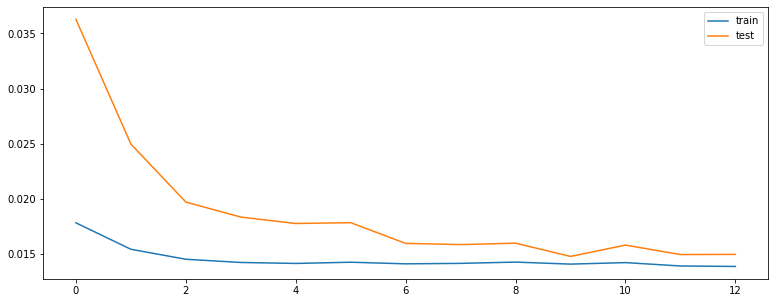

In [154]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Evaluate Model

After the model is fit, we can forecast for the entire test dataset.

We combine the forecast with the test dataset and invert the scaling. We also invert scaling on the test dataset with the expected pollution numbers.

With forecasts and actual values in their original scale, we can then calculate an error score for the model. In this case, we calculate the Root Mean Squared Error (RMSE) that gives error in the same units as the variable itself.

In [155]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

1095/1095 [==============================] - 4s 3ms/step


In [162]:
yhat

array([[0.02035481],
       [0.02118971],
       [0.01857184],
       ...,
       [0.00968766],
       [0.00970385],
       [0.00802698]], dtype=float32)

In [164]:
test_X

array([[0.02012072, 0.33823529, 0.19672131, ..., 0.0145091 , 0.        ,
        0.        ],
       [0.01911469, 0.32352941, 0.18032787, ..., 0.006101  , 0.        ,
        0.        ],
       [0.01810865, 0.32352941, 0.18032787, ..., 0.006101  , 0.        ,
        0.        ],
       ...,
       [0.01006036, 0.26470588, 0.26229508, ..., 0.40558831, 0.        ,
        0.        ],
       [0.01006036, 0.26470588, 0.26229508, ..., 0.41399641, 0.        ,
        0.        ],
       [0.00804829, 0.26470588, 0.24590164, ..., 0.42086644, 0.        ,
        0.        ]])

In [167]:
# invert scaling for forecast
inv_yhat = pd.concat([pd.DataFrame(yhat), pd.DataFrame(test_X[:, 1:])], axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat

array([20.23268038, 21.06257186, 18.4604077 , ...,  9.62952967,
        9.6456282 ,  7.97881891])

In [170]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = pd.concat([pd.DataFrame(test_y), pd.DataFrame(test_X[:, 1:])], axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [174]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.249


-  very good score 

# Conclusion

This data preparation is simple and there is more we could explore. Some ideas you could look at include:

-  One-hot encoding wind direction.
-  Making all series stationary with differencing and seasonal adjustment.
-  Providing more than 1 hour of input time steps. (This last point is perhaps the most important given the use of Backpropagation through time by LSTMs when learning sequence prediction problems)